![logo-gt.png](attachment:logo-gt.png)

<div class="alert alert-block alert-info">
    <h1>BIOS 4150/BIOL 6150</h1>
    <h3>Instructor: Dr. King Jordan</h3>
    <p>Shivam Sharma (shivamsharma13@gatech.edu), Nilavrah Sensarma (nsensarma3@gatech.edu), Bengy Gyimah-Asamoah, (bgyimaha3@gatech.edu)

</p>
</div>

<div class="alert alert-block alert-warning">
    <h2>Project 3 (Variant Calling) starter notebook (100 points)</h2>
    <h3>Deadline: 11:59PM, October 7th, 2024</h3>
</div>

<div class="alert alert-block alert-danger">
    <h2>Alert!</h2>
    <p>Do not delete any comments or information boxes the starter notebook comes with</p>
</div>

---

# **1. Getting ready for variant calling**
### *Total Questions: 6*
### *Total Points: 5 + 10 + 5 + 20 + 5 + 20 = 65*


---

<div class="alert alert-block alert-warning">
    <h3>1.1 Check your SAM file (you can also convert your SAM file to a BAM file and do the exercises on that)</h3>
    <p>1.1.1 We will start from where we left off in Project #2. We want to make sure that we are using the corrent SAM file.</p>
    <p>1.1.2 Show that your SAM file is sorted</p>
    
</div>

In [2]:
#Check you SAM file here.

In [3]:
#Show that your SAM file is sorted by genomic coordinates.

In [1]:
#This was done in last project, but we want to check the sorted file again.
!head ~/biol6150/ProjectSubmissions/Group8/Project2/ReadAlignment/SRR393028.sorted.sam

@HD	VN:1.6	SO:coordinate
@SQ	SN:chr1	LN:248956422
@SQ	SN:chr10	LN:133797422
@SQ	SN:chr11	LN:135086622
@SQ	SN:chr11_KI270721v1_random	LN:100316
@SQ	SN:chr12	LN:133275309
@SQ	SN:chr13	LN:114364328
@SQ	SN:chr14	LN:107043718
@SQ	SN:chr14_GL000009v2_random	LN:201709
@SQ	SN:chr14_GL000225v1_random	LN:211173


We know that the SAM file is sorted by genomic coordinates because the first line of the file (@HD) says coordinate after SO (sort order).

<div class="alert alert-block alert-warning">
    <h3>1.2 Basic statistics of your SAM file</h3>
    <p>Get basic stats of your SAM/BAM file. Use SAMstats to see what summary information can you get from the tool. </p>
</div>

In [1]:
# See what SAMStats can give you.
!SAMstats --help

usage: SAMstats [-h] --sorted_sam_file SORTED_SAM_FILE [--outf OUTF]
                [--chunk_size CHUNK_SIZE]

Compute SAM file mapping statistics for a SAM file sorted by read name

options:
  -h, --help            show this help message and exit
  --sorted_sam_file SORTED_SAM_FILE
                        Input SAM file. Use '-' if input is being piped from
                        stdin. File must be sorted by read name.
  --outf OUTF           Output file name to store alignment statistics. The
                        statistics will be printed to stdout if no file is
                        provided
  --chunk_size CHUNK_SIZE
                        Number of lines to read a time from sortedSamFile


<div class="alert alert-block alert-warning">
    <h3>1.3 The pieleup format</h3>
    <p><b>1.3.1</b> A lot of variant callers use the pielup format for calling variants from SAM file. Explain in 2-3 lines what is the pileup format?</p>
    <p><b>1.3.2</b> Explain the 6 columns of a pielup format file in your own words.</p>
</div>

In [ ]:
#Information about the pileup format.

The pileup format is a readable text output so that humans can understand the information the VCF has about the chromosome variants. The format is generally as follows: Chromosome Position ReferenceBase NumberOfReads AlignedBases. The pileup format  uses characters that correspond to specific indentifiers. 

In [6]:
#Information about the 6 fields of the pieleup format file.
#Write one sentence for each file.

Column 1 is the sequence identifier, usually the chromosome. 
Column 2 is the position on the chromosome. 
Column 3 is the reference base at that position. 
Column 4 is the coverage depth, which is the number of reads for the chosen position. 
Column 5 is the read results, which are characterized by different symbols that correspond to various identifiers. This is usually a string of the coverage depth number of characters for each read at the chosen position. 
Column 6 is an optional column and it holds the Phred score.

<div class="alert alert-block alert-warning">
    <h3>1.4 Create the pileup file</h3>
    <p>Using samtools, create the pileup file for the SAM file of your 1000 genomes individuals</p>
</div>

In [1]:
#copy the files to project 3
!mkdir -p ~/biol6150/ProjectSubmissions/Group8/Project3/VariantCalling
!cp ~/biol6150/ProjectSubmissions/Group8/Project2/ReadAlignment/hg38.fa ~/biol6150/ProjectSubmissions/Group8/Project3/VariantCalling
!cp ~/biol6150/ProjectSubmissions/Group8/Project2/ReadAlignment/SRR393028.sorted.sam ~/biol6150/ProjectSubmissions/Group8/Project3/VariantCalling

!ls -lh ~/biol6150/ProjectSubmissions/Group8/Project3/VariantCalling

total 4.1G
-rwxr-xr-x. 1 acressy3 gtperson 3.1G Oct  7 14:26 hg38.fa
-rwxr-xr-x. 1 acressy3 gtperson 1.1G Oct  7 14:26 SRR393028.sorted.sam


In [1]:
#Your command for pileup here.
!samtools mpileup -f ~/biol6150/ProjectSubmissions/Group8/Project3/VariantCalling/hg38.fa ~/biol6150/ProjectSubmissions/Group8/Project3/VariantCalling/SRR393028.sorted.sam > ~/biol6150/ProjectSubmissions/Group8/Project3/VariantCalling/SRR393028.mpileup

[mpileup] 1 samples in 1 input files


In [1]:
#Show the first 10 lines of the Pileup file.
!echo 'First 10 lines'
!head ~/biol6150/ProjectSubmissions/Group8/Project3/VariantCalling/SRR393028.mpileup
#Show the 10,000 - 10,010 lines of the Pileup file.
!echo 'Lines 10,000 - 10,010'
!head ~/biol6150/ProjectSubmissions/Group8/Project3/VariantCalling/SRR393028.mpileup -n10010 | tail
#Show the 200,000 - 200,010 lines of the Pileup file.
!echo 'Lines 200,000 - 200,010'
!head ~/biol6150/ProjectSubmissions/Group8/Project3/VariantCalling/SRR393028.mpileup -n200010 | tail

First 10 lines
chr1	11132	g	1	^!.	?
chr1	11133	t	1	.	?
chr1	11134	a	1	.	?
chr1	11135	g	1	.	?
chr1	11136	a	1	.	?
chr1	11137	a	1	.	?
chr1	11138	c	1	.	?
chr1	11139	c	1	.	?
chr1	11140	t	1	.	?
chr1	11141	c	1	.	?
Lines 10,000 - 10,010
chr1	485008	T	3	...	??]
chr1	485009	C	3	...	??]
chr1	485010	A	3	...	??]
chr1	485011	G	3	...	??]
chr1	485012	A	3	...	??]
chr1	485013	A	3	...	??]
chr1	485014	T	3	..^!,	?]]
chr1	485015	A	3	..,	?]]
chr1	485016	G	3	..,	?]]
chr1	485017	T	3	..,	?]]
Lines 200,000 - 200,010
chr1	3823198	A	24	,,,.,.,,..,,,.,,.,,,,,.,	???]????]?]?????]??]????
chr1	3823199	T	24	,,,.,.,,..,,,.,,.,,,,,.,	???]????]?]?????]??]????
chr1	3823200	G	24	,$,,.,.,,..,,,.,,.,,,,,.,	???]????]?]?????]??]????
chr1	3823201	A	23	,,.,.,,..,,,.,,.,,,,,.,	??]????]?]?????]??]????
chr1	3823202	C	23	,,A,.,,..,,,.,,.,,,,,.,	??]????]?]?????]??]????
chr1	3823203	A	23	,,.,.,,..,,,.,,.,,,,,.,	??]????]?]?????]??]????
chr1	3823204	C	23	,$,.,.,,..,,,.,,.,,,,,.,	??]????]?]?????]??]????
chr1	3823205	A	22	,$.,.,,.T,,,.,,.,

<div class="alert alert-block alert-warning">
    <h3>1.5 Look more into the pileup file</h3>
    <p>Show the 100,000th entry in your pileup file and explain (2-4 lines) what information column 5 <b><i>Read Results</i></b> is providing the user</p>
</div>

In [1]:
#Show the 100,000th entry here.
!head ~/biol6150/ProjectSubmissions/Group8/Project3/VariantCalling/SRR393028.mpileup -n100001 | tail -n1

chr1	1638660	G	1	,	?


In [10]:
#Explain the entry here.

The reference base is a G, indicated by column 3, and our read in column 5, denoted by a comma, means that the base is on the reverse strand of ther read but aligns to the reference genome.

<div class="alert alert-block alert-warning">
    <h3>1.6 Plot the read count distribution</h3>
    <p>A graph that shows how many reads are aligning to a specific genomic region could be helpful for determining flags for our variant caller. 
    <p>Plot a graph (thin bars or line) between <b><i>Read Count (y-axis)</i></b> and <b><i>Position (x-axis)</i></b> only for <u>chromosome 20</u>.</p>
    <hr>
    <p>You can use Python for visualization, but will have to filter the pileup file using bash or python.</p>
</div>

In [1]:
#An awk command can help you create a file with just the information for chr20.
!awk '/chr20/' ~/biol6150/ProjectSubmissions/Group8/Project3/VariantCalling/SRR393028.mpileup > ~/biol6150/ProjectSubmissions/Group8/Project3/chr20_reads.txt

In [1]:
#create CSV with only column 2 (Read Count) and 4 (Position)
!awk '/chr20/ {print $2 "," $4}' ~/biol6150/ProjectSubmissions/Group8/Project3/chr20_reads.txt > ~/biol6150/ProjectSubmissions/Group8/Project3/chr20_reads.csv

         position  read count
0           87532           1
1           87533           1
2           87534           1
3           87535           1
4           87536           1
...           ...         ...
1636496    182188           1
1636497    182189           1
1636498    182190           1
1636499    182191           1
1636500    182192           1

[1636501 rows x 2 columns]


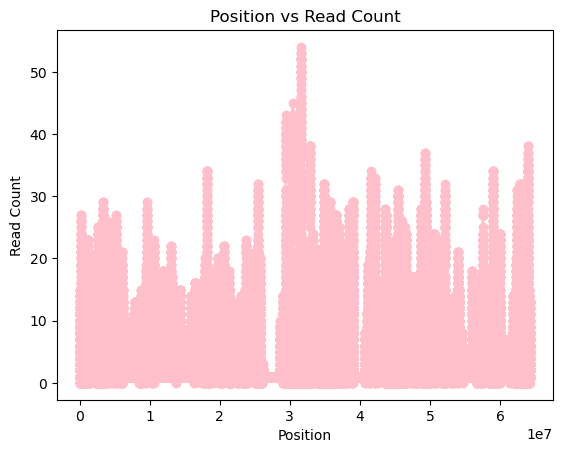

In [1]:
#Plot your graph and show it here (matplotlib/seaborn)
import pandas as pd
import matplotlib.pyplot as plt

#Loading CSV
data=pd.read_csv('~/biol6150/ProjectSubmissions/Group8/Project3/chr20_reads.csv', header=None, names=['position', 'read count'])
print (data)

#Create line plot (position vs read count)
plt.plot(data['position'], data['read count'],marker='o', linestyle='-', color='pink')

#graph labels
plt.xlabel('Position')
plt.ylabel('Read Count')
plt.title('Position vs Read Count')
plt.show()

# **2. Variant calling**
### *Total Questions: 3*
### *Total Points: 10+5+2+10 = 27*


---

<div class="alert alert-block alert-warning">
    <h3>2.1 Call the variants (SNPs and Short Indels)</h3>
    <p><b>2.1.1</b> Write the command used and justify the flags you have used using one sentence.</p>
    <p><b>2.1.2</b> Informed decision.</p>
</div>

In [1]:
#Use VarScan for calling variants. Look up the appropriate command for this.

#Running VarScan
!varscan

VarScan v2.4.6

***NON-COMMERCIAL VERSION***

USAGE: java -jar VarScan.jar [COMMAND] [OPTIONS] 

COMMANDS:
	pileup2snp		Identify SNPs from a pileup file
	pileup2indel		Identify indels a pileup file
	pileup2cns		Call consensus and variants from a pileup file
	mpileup2snp		Identify SNPs from an mpileup file
	mpileup2indel		Identify indels an mpileup file
	mpileup2cns		Call consensus and variants from an mpileup file

	somatic			Call germline/somatic variants from tumor-normal pileups
	mpileup2somatic		Call germline/somatic variants in multi-tumor-normal mpileup (beta feature in v2.4.5)
	copynumber		Determine relative tumor copy number from tumor-normal pileups
	readcounts		Obtain read counts for a list of variants from a pileup file

	filter			Filter SNPs by coverage, frequency, p-value, etc.
	somaticFilter		Filter somatic variants for clusters/indels
	fpfilter		Apply the false-positive filter

	processSomatic		Isolate Germline/LOH/Somatic calls from output
	copyCaller		GC-adjust and pro

In [1]:
# Using mpileup2cns because this command will identify variants of the mpileup file we created in section 1 that summarized bases of aling reads
!varscan mpileup2cns ~/biol6150/ProjectSubmissions/Group8/Project3/VariantCalling/SRR393028.mpileup --min-reads2 10 --output-vcf > ~/biol6150/ProjectSubmissions/Group8/Project3/VariantCalling/SRR393028.vcf

Min coverage:	8
Min reads2:	10
Min var freq:	0.2
Min avg qual:	15
P-value thresh:	0.01
Reading input from /home/hice1/acressy3/biol6150/ProjectSubmissions/Group8/Project3/VariantCalling/SRR393028.mpileup
70626195 bases in pileup file
1484 variant positions (1469 SNP, 15 indel)
32 were failed by the strand-filter
1484 variant positions reported (1469 SNP, 15 indel)


In [1]:
!varscan mpileup2cns ~/biol6150/ProjectSubmissions/Group8/Project3/VariantCalling/SRR393028.mpileup --min-reads2 10 --output-vcf 1 > ~/biol6150/ProjectSubmissions/Group8/Project3/VariantCalling/SRR393028.vcf

Min coverage:	8
Min reads2:	10
Min var freq:	0.2
Min avg qual:	15
P-value thresh:	0.01
Reading input from /home/hice1/acressy3/biol6150/ProjectSubmissions/Group8/Project3/VariantCalling/SRR393028.mpileup
70626195 bases in pileup file
1484 variant positions (1469 SNP, 15 indel)
32 were failed by the strand-filter
1484 variant positions reported (1469 SNP, 15 indel)


In [18]:
#Make an informed decision (based on section 1) about the parameters used for calling the variants.
#There is no specific answer to this, but the idea is to look into the flags used, and make sure they make sense.

<div class="alert alert-block alert-warning">
    <h3>2.2 Select any random variant in your VCF file which lies between the positions 20,800,000 and 30,800,000 on chromosome 16</h3>
    <p><b>Q.</b> What is the average depth of bases for this variant called on chromosome 16</p>
</div>

In [1]:
#Extract this variant. There are multiple ways of doing this. Some fast and some easy.
!grep -P '^(#|chr16\s+29985888)' ~/biol6150/ProjectSubmissions/Group8/Project3/VariantCalling/SRR393028.vcf

##fileformat=VCFv4.3
##source=VarScan2
##INFO=<ID=ADP,Number=1,Type=Integer,Description="Average per-sample depth of bases with Phred score >= 15">
##INFO=<ID=WT,Number=1,Type=Integer,Description="Number of samples called reference (wild-type)">
##INFO=<ID=HET,Number=1,Type=Integer,Description="Number of samples called heterozygous-variant">
##INFO=<ID=HOM,Number=1,Type=Integer,Description="Number of samples called homozygous-variant">
##INFO=<ID=NC,Number=1,Type=Integer,Description="Number of samples not called">
##FILTER=<ID=str10,Description="Less than 10% or more than 90% of variant supporting reads on one strand">
##FILTER=<ID=indelError,Description="Likely artifact due to indel reads at this position">
##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
##FORMAT=<ID=GQ,Number=1,Type=Integer,Description="Genotype Quality">
##FORMAT=<ID=SDP,Number=1,Type=Integer,Description="Raw Read Depth as reported by SAMtools">
##FORMAT=<ID=DP,Number=1,Type=Integer,Description="Quality

In [29]:
#There could be multiple variants in this range, please select one.

In [2]:
#The information is there in your VCF file.

The average depth of the variant is represented by ADP, which is one.

<div class="alert alert-block alert-warning">
    <h3>2.3 How many indels do you have in your VCF file?</p>
</div>

In [4]:
#Same as above, there are multiple ways of doing this.

In [24]:
#Write your command and show the number of indels.

There are 15 indels. We're still trying to figure it out.

<div class="alert alert-block alert-warning">
    <h3>2.4 Select any random variant in your VCF file which lies between the position 203,000,000 and 230,000,000 on chromosome 2.</h3>
    <p><b>2.4.1</b> What is the variation observed for your 1000 genome individual at this position? Is it 0/0 1/1/ 0/1 or 1/0? How many copies of reference alleles does your individual carry at this position?</p>
    <p><b>2.4.2</b> How many read bases (forward and reverse) from your pileup file (as selected by VarScan) supported the alternative allele and how many variants supported the reference allele at this position?</p>
</div>

In [1]:
!head ~/biol6150/ProjectSubmissions/Group8/Project3/VariantCalling/SRR393028.vcf -n39000920 | tail

chr2	219635909	.	G	.	.	PASS	ADP=1;WT=0;HET=0;HOM=0;NC=1	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	./.:.:1
chr2	219635910	.	G	.	.	PASS	ADP=1;WT=0;HET=0;HOM=0;NC=1	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	./.:.:1
chr2	219635911	.	G	.	.	PASS	ADP=1;WT=0;HET=0;HOM=0;NC=1	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	./.:.:1
chr2	219636130	.	A	.	.	PASS	ADP=1;WT=0;HET=0;HOM=0;NC=1	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	./.:.:1
chr2	219636131	.	T	.	.	PASS	ADP=1;WT=0;HET=0;HOM=0;NC=1	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	./.:.:1
chr2	219636132	.	T	.	.	PASS	ADP=1;WT=0;HET=0;HOM=0;NC=1	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	./.:.:1
chr2	219636133	.	G	.	.	PASS	ADP=1;WT=0;HET=0;HOM=0;NC=1	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	./.:.:1
chr2	219636134	.	G	.	.	PASS	ADP=1;WT=0;HET=0;HOM=0;NC=1	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	./.:.:1
chr2	219636135	.	G	.	.	PASS	ADP=1;WT=0;HET=0;HOM=0;NC=1	GT:GQ:SD

In [14]:
#Select the variant.
!grep -P '^(#|chr2\s+219633235)' ~/biol6150/ProjectSubmissions/Group8/Project3/VariantCalling/SRR393028.vcf

##fileformat=VCFv4.3
##source=VarScan2
##INFO=<ID=ADP,Number=1,Type=Integer,Description="Average per-sample depth of bases with Phred score >= 15">
##INFO=<ID=WT,Number=1,Type=Integer,Description="Number of samples called reference (wild-type)">
##INFO=<ID=HET,Number=1,Type=Integer,Description="Number of samples called heterozygous-variant">
##INFO=<ID=HOM,Number=1,Type=Integer,Description="Number of samples called homozygous-variant">
##INFO=<ID=NC,Number=1,Type=Integer,Description="Number of samples not called">
##FILTER=<ID=str10,Description="Less than 10% or more than 90% of variant supporting reads on one strand">
##FILTER=<ID=indelError,Description="Likely artifact due to indel reads at this position">
##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
##FORMAT=<ID=GQ,Number=1,Type=Integer,Description="Genotype Quality">
##FORMAT=<ID=SDP,Number=1,Type=Integer,Description="Raw Read Depth as reported by SAMtools">
##FORMAT=<ID=DP,Number=1,Type=Integer,Description="Quality

In [1]:
#filtering the file to only show variations
!bcftools view -v snps,indels ~/biol6150/ProjectSubmissions/Group8/Project3/VariantCalling/SRR393028.vcf > ~/biol6150/ProjectSubmissions/Group8/Project3/filtered_SRR393028.vcf

[W::vcf_parse] Contig 'chr1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr10' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr11' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr11_KI270721v1_random' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr12' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr13' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr14' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr14_GL000009v2_random' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr14_GL000225v1_random' is not defined in the header. (Quick workaround: index the fi

[W::vcf_parse] Contig 'chr2_KI270767v1_alt' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr3_JH636055v2_alt' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr3_KI270780v1_alt' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr3_GL383526v1_alt' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr3_KI270777v1_alt' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr3_KI270779v1_alt' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr3_KI270782v1_alt' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr3_KI270784v1_alt' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr4_KI27

[W::vcf_parse] Contig 'chr12_KI270836v1_alt' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr13_KI270840v1_alt' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr13_KI270839v1_alt' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr13_KI270838v1_alt' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr13_KI270842v1_alt' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr14_KI270844v1_alt' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr14_KI270847v1_alt' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr14_KI270845v1_alt' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'c

[W::vcf_parse] Contig 'chr19_KI270886v1_alt' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr19_KI270887v1_alt' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr19_KI270888v1_alt' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr19_KI270889v1_alt' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr19_KI270890v1_alt' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr19_KI270891v1_alt' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr1_KI270892v1_alt' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr2_KI270894v1_alt' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr

[W::vcf_parse] Contig 'chr19_KI270938v1_alt' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chrM' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chrUn_KI270442v1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chrUn_KI270467v1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chrUn_KI270438v1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chrUn_KI270512v1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chrUn_KI270519v1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chrUn_GL000195v1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chrUn_GL000219v1' is not defined in the h

In [1]:
#checking the head
!head -50 ~/biol6150/ProjectSubmissions/Group8/Project3/filtered_SRR393028.vcf

##fileformat=VCFv4.3
##FILTER=<ID=PASS,Description="All filters passed">
##source=VarScan2
##INFO=<ID=ADP,Number=1,Type=Integer,Description="Average per-sample depth of bases with Phred score >= 15">
##INFO=<ID=WT,Number=1,Type=Integer,Description="Number of samples called reference (wild-type)">
##INFO=<ID=HET,Number=1,Type=Integer,Description="Number of samples called heterozygous-variant">
##INFO=<ID=HOM,Number=1,Type=Integer,Description="Number of samples called homozygous-variant">
##INFO=<ID=NC,Number=1,Type=Integer,Description="Number of samples not called">
##FILTER=<ID=str10,Description="Less than 10% or more than 90% of variant supporting reads on one strand">
##FILTER=<ID=indelError,Description="Likely artifact due to indel reads at this position">
##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
##FORMAT=<ID=GQ,Number=1,Type=Integer,Description="Genotype Quality">
##FORMAT=<ID=SDP,Number=1,Type=Integer,Description="Raw Read Depth as reported by SAMtools">
##FORM

In [1]:
#looking from the tail for chr2
!head ~/biol6150/ProjectSubmissions/Group8/Project3/filtered_SRR393028.vcf -n900 | tail

chr2	179945453	.	C	T	.	PASS	ADP=10;WT=0;HET=0;HOM=1;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	1/1:52:10:10:0:10:100%:5.4125E-6:0:36:0:0:2:8
chr2	191386000	.	G	A	.	PASS	ADP=18;WT=0;HET=0;HOM=1;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	1/1:99:18:18:0:18:100%:1.1019E-10:0:31:0:0:10:8
chr2	201258272	.	A	G	.	PASS	ADP=15;WT=0;HET=0;HOM=1;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	1/1:81:15:15:0:15:100%:6.4467E-9:0:32:0:0:3:12
chr2	205743315	.	T	C	.	PASS	ADP=11;WT=0;HET=0;HOM=1;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	1/1:58:12:11:0:11:100%:1.4176E-6:0:28:0:0:2:9
chr2	208171988	.	T	C	.	PASS	ADP=15;WT=0;HET=0;HOM=1;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	1/1:81:15:15:0:15:100%:6.4467E-9:0:36:0:0:10:5
chr2	208172054	.	A	G	.	PASS	ADP=21;WT=0;HET=0;HOM=1;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	1/1:117:21:21:0:21:100%:1.8578E-12:0:34:0:0:4:17
chr2	218454934	.	A	G	.	PASS	ADP=11;WT=0;HET=0;HOM=1;NC=0	

In [1]:
#grep for the specific chromosome 2 variant 219224963 
!grep -P '^(#|chr2\s+219224963)' ~/biol6150/ProjectSubmissions/Group8/Project3/filtered_SRR393028.vcf

##fileformat=VCFv4.3
##FILTER=<ID=PASS,Description="All filters passed">
##source=VarScan2
##INFO=<ID=ADP,Number=1,Type=Integer,Description="Average per-sample depth of bases with Phred score >= 15">
##INFO=<ID=WT,Number=1,Type=Integer,Description="Number of samples called reference (wild-type)">
##INFO=<ID=HET,Number=1,Type=Integer,Description="Number of samples called heterozygous-variant">
##INFO=<ID=HOM,Number=1,Type=Integer,Description="Number of samples called homozygous-variant">
##INFO=<ID=NC,Number=1,Type=Integer,Description="Number of samples not called">
##FILTER=<ID=str10,Description="Less than 10% or more than 90% of variant supporting reads on one strand">
##FILTER=<ID=indelError,Description="Likely artifact due to indel reads at this position">
##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
##FORMAT=<ID=GQ,Number=1,Type=Integer,Description="Genotype Quality">
##FORMAT=<ID=SDP,Number=1,Type=Integer,Description="Raw Read Depth as reported by SAMtools">
##FORM

In [1]:
#looking for the variant **IGNORE**
#!grep -v '^#' ~/biol6150/ProjectSubmissions/Group8/Project3/VariantCalling/SRR393028.vcf | awk '{if(length($4) == 1 && length($5) == 1 || length($4) > 1 || length($5) > 1) print $0}' > variants_snps_indels.vcf

In [26]:
#Variation observed and number of copies for reference allele.

Variation position: Chr2 219334963

In [ ]:
#Number of reads supporting the ref & alt allele.

Number of copies: Since this variant is 1/1, it is homozygous alternate. Therefore, there are 2 copes of the alternate alleles and 0 copies of the reference allele. It is also 0 since wt=0, which is the number of samples called reference "wild type."
*This is an unphased file, so the 1 and 0 are interchangable.  

# **3. Filtering**
### *Total Questions: 1*
### *Total Points: 8 = 8*


---

<div class="alert alert-block alert-warning">
    <h3>3.1 Extract variants that have average per sample depth of > 50. </h3>
    <p>Show your command and number of variants before and after</p>
</div>

In [1]:
#finding variants with at least 25 reads supporting the alt allele
!varscan filter ~/biol6150/ProjectSubmissions/Group8/Project3/filtered_SRR393028.vcf --min-reads2 50 --output-file ~/biol6150/ProjectSubmissions/Group8/Project3/VSfiltered_SRR393028.vcf 

Min coverage:	10
Min reads2:	50
Min strands2:	1
Min var freq:	0.2
Min avg qual:	15
P-value thresh:	0.1
Reading input from /home/hice1/kbook6/biol6150/ProjectSubmissions/Group8/Project3/filtered_SRR393028.vcf
1484 entries in input stream
0 had no genotype
0 were called wild-type
0 failed coverage
1476 failed reads2
0 failed strands
0 failed quality
0 failed variant frequency < 0.2
0 failed P-value > 0.1
0 were removed near indels
8 passed filters


Originally, 1484 variants were enterd in the command, and 1476 failed to pass the filters. 
8 reads passed the filters, meaning that 8 variants have a depth of at least 50.